In [9]:
import matplotlib.pyplot as plt
import nibabel as nii
from pathlib import Path
import numpy as np
import skimage.color as color
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0



In [10]:
from PIL import Image

image_example = "/home/shamil/PycharmProjects/covid_segmentation/data/raw/images/study_0269.nii"
label_example = "/home/shamil/PycharmProjects/covid_segmentation/data/raw/labels/study_0269_mask.nii"

image = nii.load(image_example).get_fdata()
image = (image - image.min()) / (image.max() - image.min() + 1e-8) * 255
image = image.astype(np.uint8)

label = nii.load(label_example).get_fdata()
label = label.astype(np.uint8)

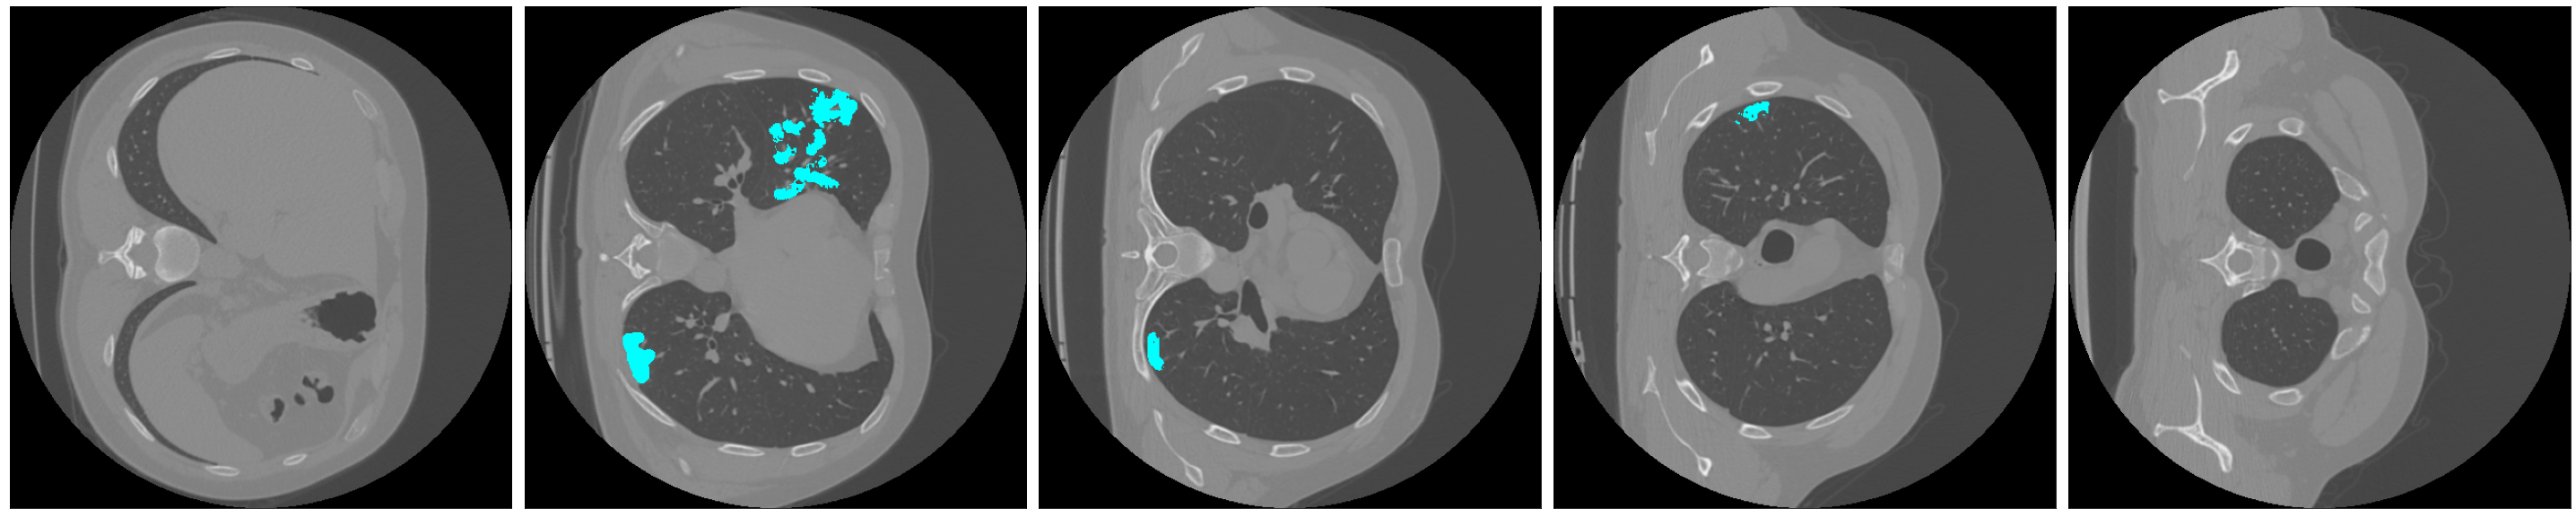

In [17]:
fig, axes = plt.subplots(ncols=5, figsize=(40, 10))

slices = (10, 20, 25, 30, 35)
for ii, idx in enumerate(slices):
    image_slice = image[:, :, idx]
    image_slice = color.gray2rgb(image_slice)

    label_slice = label[:, :, idx]

    image_slice[label_slice == 1] = (0, 255, 255)

    axes[ii].imshow(image_slice)
    axes[ii].grid(False)
    axes[ii].set_xticks([])
    axes[ii].set_yticks([])

fig.tight_layout()
fig.savefig("../figures/visualisation.png")

